# RQ2: Impact of different prompting techniques on detecting bug-fix related diff

In [1]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd

from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix
from modules.Untangler import GeminiUntangler, OpenAIUntangler, FreeUntangler

In [2]:
df = pd.read_csv("./data/Complete_GoldSet.csv")

In [5]:
os.makedirs("./Results/RQ2", exist_ok=True)

# Few-shot

In [4]:
save_path = "./Results/RQ2/FewShot/"
os.makedirs(save_path, exist_ok=True)

## gpt-4o

In [ ]:
model_name = "gpt-4o"
untangler = OpenAIUntangler(model_name, True, 2, False)
result = untangler.batch_detect(df, iteratively=False)
result.to_csv(f"{save_path}{model_name}.csv", index = False)

In [5]:
model_name = "gpt-4o"
untangler = OpenAIUntangler(model_name, True, 0, False)
_, result = untangler.get_batch_result("batch_67e10d48199881908ed9c2d03ecefa16", df)
result.to_csv(f"{save_path}{model_name}.csv", index = False)

100%|██████████| 1776/1776 [00:00<00:00, 46267601.89it/s]


In [6]:
model_name = "gpt-4o"
result = pd.read_csv(f"{save_path}{model_name}.csv")
print(classification_report(result["Decision"], result["Detection"]))

              precision    recall  f1-score   support

       Buggy       0.90      0.83      0.87       900
    NotBuggy       0.84      0.91      0.87       876

    accuracy                           0.87      1776
   macro avg       0.87      0.87      0.87      1776
weighted avg       0.87      0.87      0.87      1776



              precision    recall  f1-score   support

       Buggy       0.80      0.87      0.83       168
    NotBuggy       0.83      0.75      0.79       144

    accuracy                           0.81       312
   macro avg       0.82      0.81      0.81       312
weighted avg       0.82      0.81      0.81       312



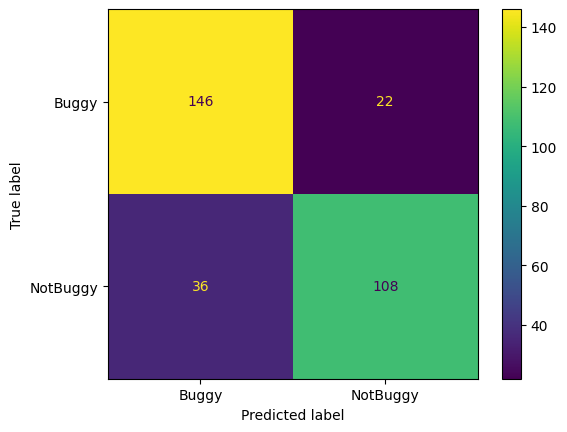

In [7]:
g = pd.read_csv("./data/GoldSet.csv")
filtered_result = result[result['CommitHash'].isin(g['CommitHash'])]
print(classification_report(filtered_result["Decision"], filtered_result["Detection"]))
cm = confusion_matrix(filtered_result["Decision"], filtered_result["Detection"], labels=["Buggy", "NotBuggy"])
fig = ConfusionMatrixDisplay(cm, display_labels=["Buggy", "NotBuggy"])
fig.plot()

## gemini-2.0-flash

In [11]:
model_name = "gemini-2.0-flash"
untangler = GeminiUntangler(model_name, True, 2, False)
result = untangler.batch_detect(df)
result["Detection"] = result["Detection"].apply(lambda x: x.strip())
result.to_csv(f"{save_path}{model_name}.csv", index = False)

1776it [11:57,  2.48it/s]


In [12]:
model_name = "gemini-2.0-flash"
result = pd.read_csv(f"{save_path}{model_name}.csv")
print(classification_report(result["Decision"], result["Detection"]))

              precision    recall  f1-score   support

       Buggy       0.72      0.99      0.83       900
    NotBuggy       0.98      0.61      0.75       876

    accuracy                           0.80      1776
   macro avg       0.85      0.80      0.79      1776
weighted avg       0.85      0.80      0.79      1776



              precision    recall  f1-score   support

       Buggy       0.58      0.99      0.73       168
    NotBuggy       0.96      0.16      0.27       144

    accuracy                           0.61       312
   macro avg       0.77      0.58      0.50       312
weighted avg       0.75      0.61      0.52       312



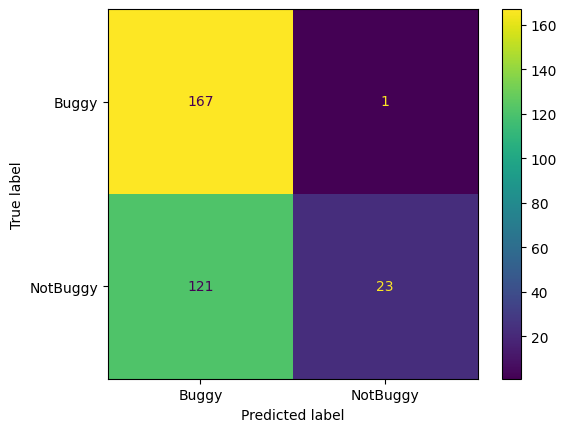

In [13]:
g = pd.read_csv("./data/GoldSet.csv")
filtered_result = result[result['CommitHash'].isin(g['CommitHash'])]
print(classification_report(filtered_result["Decision"], filtered_result["Detection"]))
cm = confusion_matrix(filtered_result["Decision"], filtered_result["Detection"], labels=["Buggy", "NotBuggy"])
fig = ConfusionMatrixDisplay(cm, display_labels=["Buggy", "NotBuggy"])
fig.plot()

# Chain of Thought

In [23]:
save_path = "./Results/RQ2/COT/"
os.makedirs(save_path, exist_ok=True)

## gpt-4o

In [ ]:
model_name = "gpt-4o"
untangler = OpenAIUntangler(model_name, True, 0, True)
result = untangler.batch_detect(df, iteratively=False)
result.to_csv(f"{save_path}{model_name}.csv", index = False)

In [ ]:
model_name = "gpt-4o"
result = pd.read_csv(f"{save_path}{model_name}.csv")
print(classification_report(result["Decision"], result["Detection"]))

In [ ]:
g = pd.read_csv("./data/GoldSet.csv")
filtered_result = result[result['CommitHash'].isin(g['CommitHash'])]
print(classification_report(filtered_result["Decision"], filtered_result["Detection"]))
cm = confusion_matrix(filtered_result["Decision"], filtered_result["Detection"], labels=["Buggy", "NotBuggy"])
fig = ConfusionMatrixDisplay(cm, display_labels=["Buggy", "NotBuggy"])
fig.plot()

## gemini-2.0-flash

In [ ]:
model_name = "gemini-2.0-flash"
untangler = GeminiUntangler(model_name, True, 0, True)
result = untangler.batch_detect(df)
result["Detection"] = result["Detection"].apply(lambda x: x.strip())
result["Detection"] = result["Detection"].apply(lambda x: x.replace("**Conclusion:**", "").strip())
result["Detection"] = result["Detection"].apply(lambda x: x.replace("Conclusion:", "").strip())
result["Detection"] = result["Detection"].apply(lambda x: x.replace("** **", "").strip())
result.to_csv(f"{save_path}{model_name}.csv", index = False)

1776it [52:33,  1.78s/it]


In [33]:
model_name = "gemini-2.0-flash"
result = pd.read_csv(f"{save_path}{model_name}.csv")
print(classification_report(result["Decision"], result["Detection"]))

              precision    recall  f1-score   support

       Buggy       0.69      0.98      0.81       900
    NotBuggy       0.97      0.54      0.69       876

    accuracy                           0.77      1776
   macro avg       0.83      0.76      0.75      1776
weighted avg       0.83      0.77      0.75      1776



              precision    recall  f1-score   support

       Buggy       0.60      1.00      0.75       168
    NotBuggy       1.00      0.24      0.38       144

    accuracy                           0.65       312
   macro avg       0.80      0.62      0.57       312
weighted avg       0.79      0.65      0.58       312



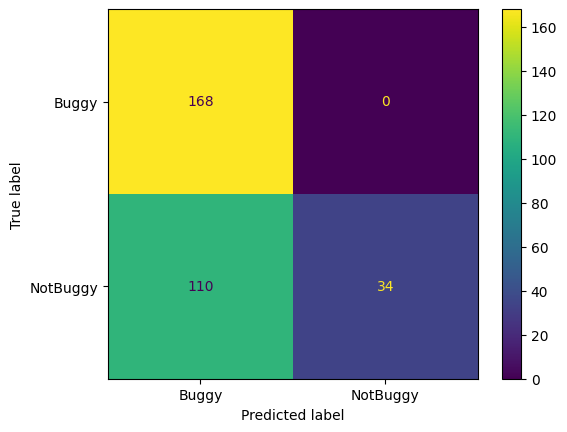

In [34]:
g = pd.read_csv("./data/GoldSet.csv")
filtered_result = result[result['CommitHash'].isin(g['CommitHash'])]
print(classification_report(filtered_result["Decision"], filtered_result["Detection"]))
cm = confusion_matrix(filtered_result["Decision"], filtered_result["Detection"], labels=["Buggy", "NotBuggy"])
fig = ConfusionMatrixDisplay(cm, display_labels=["Buggy", "NotBuggy"])
fig.plot()

# Few-shot + Chain of Thought

In [36]:
save_path = "./Results/RQ2/FewShotCOT/"
os.makedirs(save_path, exist_ok=True)

## gpt-4o

In [ ]:
model_name = "gpt-4o"
untangler = OpenAIUntangler(model_name, True, 2, True)
result = untangler.batch_detect(df, iteratively=False)
result.to_csv(f"{save_path}{model_name}.csv", index = False)

In [ ]:
model_name = "gpt-4o"
result = pd.read_csv(f"{save_path}{model_name}.csv")
print(classification_report(result["Decision"], result["Detection"]))

In [ ]:
g = pd.read_csv("./data/GoldSet.csv")
filtered_result = result[result['CommitHash'].isin(g['CommitHash'])]
print(classification_report(filtered_result["Decision"], filtered_result["Detection"]))
cm = confusion_matrix(filtered_result["Decision"], filtered_result["Detection"], labels=["Buggy", "NotBuggy"])
fig = ConfusionMatrixDisplay(cm, display_labels=["Buggy", "NotBuggy"])
fig.plot()

## gemini-2.0-flash

In [39]:
model_name = "gemini-2.0-flash"
untangler = GeminiUntangler(model_name, True, 2, True)
result = untangler.batch_detect(df)
result["Detection"] = result["Detection"].apply(lambda x: x.strip())
result.to_csv(f"{save_path}{model_name}.csv", index = False)

1776it [34:31,  1.17s/it]


In [40]:
model_name = "gemini-2.0-flash"
result = pd.read_csv(f"{save_path}{model_name}.csv")
print(classification_report(result["Decision"], result["Detection"]))

              precision    recall  f1-score   support

       Buggy       0.73      0.98      0.84       900
    NotBuggy       0.97      0.63      0.76       876

    accuracy                           0.81      1776
   macro avg       0.85      0.80      0.80      1776
weighted avg       0.85      0.81      0.80      1776



              precision    recall  f1-score   support

       Buggy       0.62      0.99      0.76       168
    NotBuggy       0.96      0.30      0.46       144

    accuracy                           0.67       312
   macro avg       0.79      0.64      0.61       312
weighted avg       0.78      0.67      0.62       312



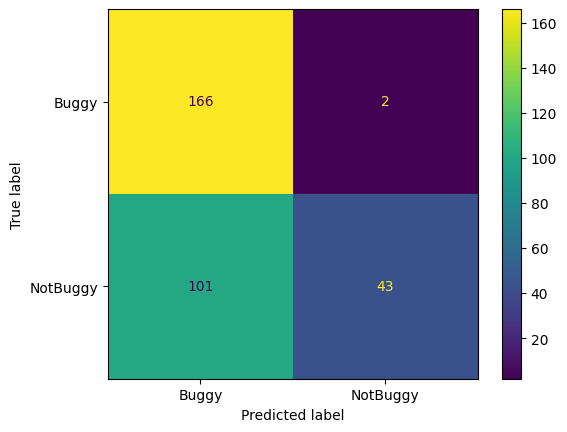

In [41]:
g = pd.read_csv("./data/GoldSet.csv")
filtered_result = result[result['CommitHash'].isin(g['CommitHash'])]
print(classification_report(filtered_result["Decision"], filtered_result["Detection"]))
cm = confusion_matrix(filtered_result["Decision"], filtered_result["Detection"], labels=["Buggy", "NotBuggy"])
fig = ConfusionMatrixDisplay(cm, display_labels=["Buggy", "NotBuggy"])
fig.plot()